In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import random
import visuals as vs

%matplotlib inline

In [69]:
data_file_name = "housing.csv"
data = pd.read_csv(data_file_name)
prices = data['MEDV']
features = data.drop('MEDV', axis=1)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


Boston housing dataset has 489 data points with 4 variables each.


In [60]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


In [61]:
from sklearn.metrics import r2_score

def performance_metrics(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [62]:
y_true = [3, -0.5, 2, 7, 4.2]
y_predict = [2.5, 0.0, 2.1, 7.8, 5.3]

score = performance_metrics(y_true, y_predict)
print(f'model has a coefficient of determination equal {score}')

model has a coefficient of determination equal 0.9228556485355649


In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, shuffle=True, test_size=0.2)

print(len(X_train))
print(len(X_test))

391
98


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\my pc\appdata\local\programs\python\python37\lib\si

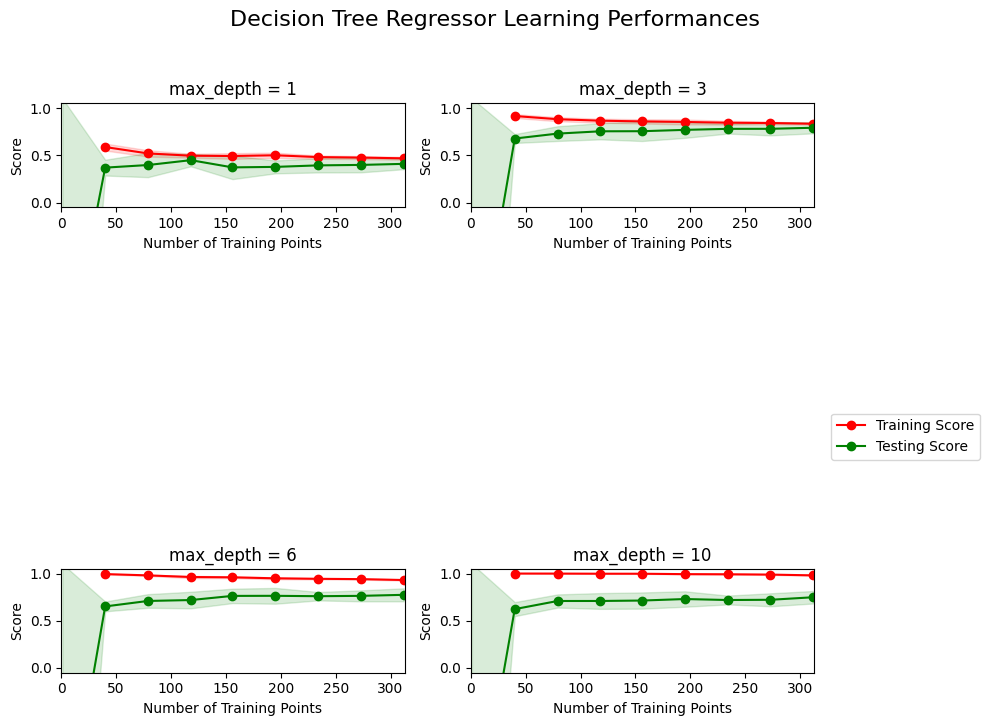

In [36]:
vs.ModelLearning(X_train, y_train)

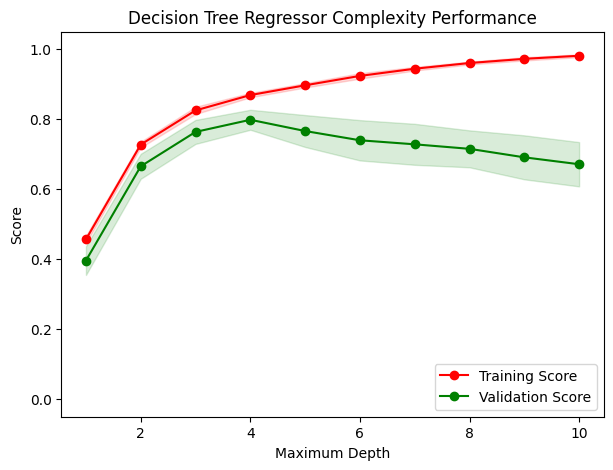

In [37]:
vs.ModelComplexity(features, prices)

In [64]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metrics)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_
    

In [65]:
reg = fit_model(X_train, y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))


Parameter 'max_depth' is 4 for the optimal model.


In [66]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
prices = []
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    prices.append(price)
    

Predicted selling price for Client 1's home: $421,278.26
Predicted selling price for Client 2's home: $228,987.50
Predicted selling price for Client 3's home: $925,453.85


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [71]:
vs.PredictTrials(features, prices, fit_model, client_data)

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 1: $391,183.33


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 2: $419,700.00


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 3: $415,800.00


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 4: $420,622.22


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 5: $418,377.27


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 6: $411,931.58


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 7: $399,663.16


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 8: $407,232.00


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
